In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import statsmodels
import matplotlib.pyplot as plt
import math

from pivottablejs import pivot_ui

In [200]:
df = pd.read_csv("all_data.csv")
print(df.tail(4))

     Country  Year  Life expectancy at birth (years)           GDP
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10


In [201]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
(96, 4)


In [202]:
df_renamed = df.rename(columns={"Country": "country", "Year": "year", "Life expectancy at birth (years)": "life_exp_years", "GDP": "gdp"})
print(df_renamed.head(2))

  country  year  life_exp_years           gdp
0   Chile  2000            77.3  7.786093e+10
1   Chile  2001            77.3  7.097992e+10


In [203]:
df_renamed["gdp_bil"] = df_renamed.gdp / 1000000000
df_renamed.head(2)

,country,year,life_exp_years,gdp,gdp_bil
0,Chile,2000,77.3,7.786093e+10,77.860932
1,Chile,2001,77.3,7.097992e+10,70.979924


In [204]:
#rename to USA
df_renamed.loc[df_renamed["country"] == "United States of America", "country"] = "USA"

In [205]:
df_describe = df_renamed.describe(include="all")
print(df_describe)
print(type(df_describe))

       country         year  life_exp_years           gdp       gdp_bil
count       96    96.000000       96.000000  9.600000e+01     96.000000
unique       6          NaN             NaN           NaN           NaN
top      Chile          NaN             NaN           NaN           NaN
freq        16          NaN             NaN           NaN           NaN
mean       NaN  2007.500000       72.789583  3.880499e+12   3880.498571
std        NaN     4.633971       10.672882  5.197561e+12   5197.561311
min        NaN  2000.000000       44.300000  4.415703e+09      4.415703
25%        NaN  2003.750000       74.475000  1.733018e+11    173.301750
50%        NaN  2007.500000       76.750000  1.280220e+12   1280.220000
75%        NaN  2011.250000       78.900000  4.067510e+12   4067.510000
max        NaN  2015.000000       81.000000  1.810000e+13  18100.000000
<class 'pandas.core.frame.DataFrame'>


In [206]:
countries = [x for x in np.unique(df_renamed.country)]

## GDP Analysis:

In [207]:
print(df_describe.gdp_bil)

count        96.000000
unique             NaN
top                NaN
freq               NaN
mean       3880.498571
std        5197.561311
min           4.415703
25%         173.301750
50%        1280.220000
75%        4067.510000
max       18100.000000
Name: gdp_bil, dtype: float64


In [225]:
data = {'country': [], 'GDP_min': [], 'GDP_max': [], 'GDP_mean': [], 'GDP_2000': [], 'GDP_2015': [], 'GDP_growth': []}

for i in range(len(countries)):
   country = countries[i]
   country_data = df_renamed[df_renamed.country == country]

   gdp_min = np.min(country_data.gdp_bil)
   gdp_max = np.max(country_data.gdp_bil)
   gdp_mean = np.mean(country_data.gdp_bil)
   gdp_2000 = country_data.loc[country_data.year == 2000, "gdp_bil"].values[0]
   gdp_2015 = country_data.loc[country_data.year == 2015, "gdp_bil"].values[0]
   gdp_growth = (gdp_2015 / gdp_2000) - 1

   data['country'].append(country)
   data['GDP_min'].append(round(gdp_min, 2))
   data['GDP_max'].append(round(gdp_max, 2))
   data['GDP_mean'].append(round(gdp_mean))
   data['GDP_2000'].append(round(gdp_2000, 2))
   data['GDP_2015'].append(round(gdp_2015, 2))
   data['GDP_growth'].append(gdp_growth)

gdp_df = pd.DataFrame.from_dict(data)
print(gdp_df)

    country   GDP_min   GDP_max  GDP_mean  GDP_2000  GDP_2015  GDP_growth
0     Chile     69.74    278.38       170     77.86    242.52    2.114758
1     China   1211.35  11064.70      4958   1211.35  11064.70    8.134189
2   Germany   1949.95   3890.61      3095   1949.95   3375.61    0.731126
3    Mexico    683.65   1298.46       977    683.65   1152.26    0.685458
4       USA  10300.00  18100.00     14075  10300.00  18100.00    0.757282
5  Zimbabwe      4.42     16.30         9      6.69     16.30    1.437186


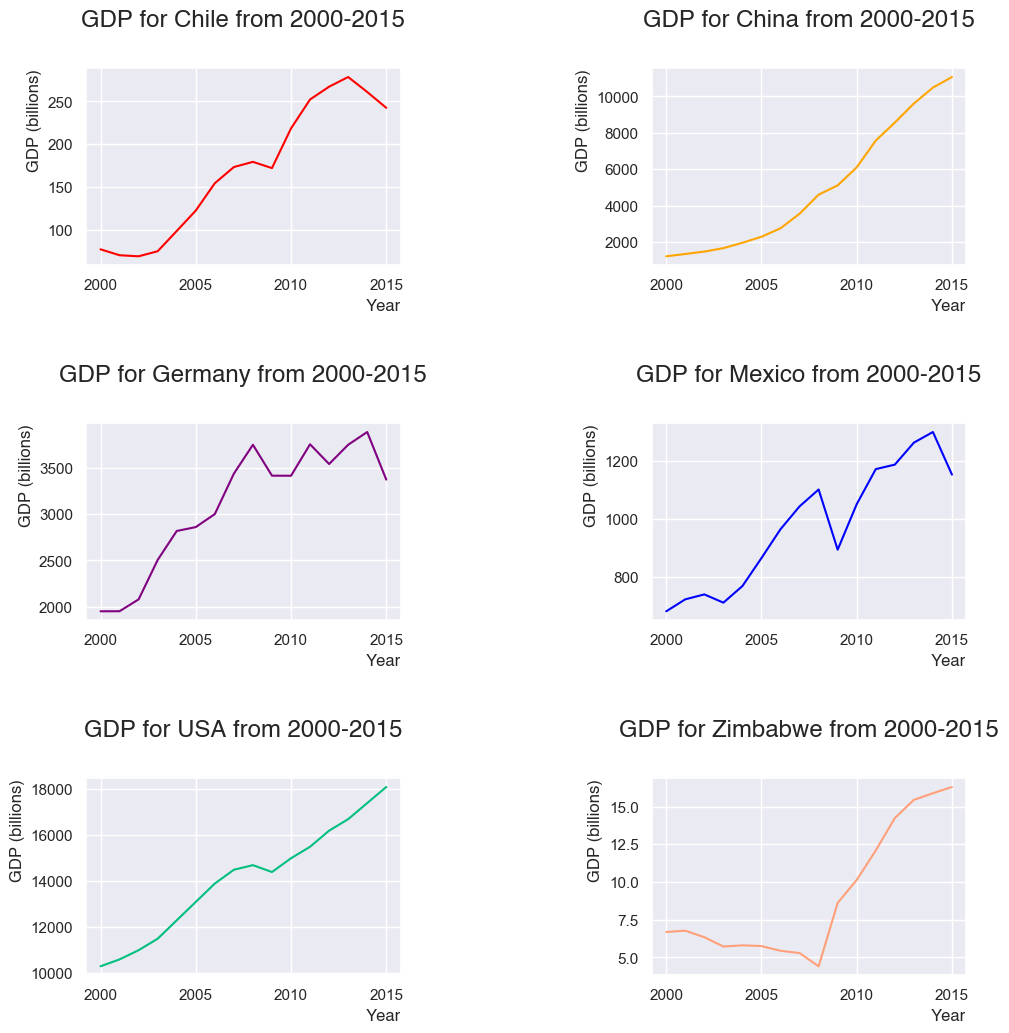

<Figure size 640x480 with 0 Axes>

In [209]:
# line graphs GDP by country
colors = ['#FF0000', '#FFA500', '#800080', '#0000FF', '#00bf7F', '#FFA07A', '#ADD8E6']
countries = [x for x in np.unique(df_renamed.country)]

for i in range(len(countries)):
   country = countries[i]
   country_data = df_renamed[df_renamed.country == country]
   plt.subplot(3, 2, i+1)
   plt.plot(country_data.year, country_data.gdp_bil, c=colors[i])
   plt.title(f"GDP for {country} from 2000-2015", pad=30, fontdict={"fontname":"Helvetica", "fontsize":"x-large"})
   plt.xlabel("Year", loc="right", fontdict={"fontname":"Helvetica", "fontsize":"medium"})
   plt.ylabel("GDP (billions)", loc="top", fontdict={"fontname":"Helvetica", "fontsize":"medium"})

plt.subplots_adjust(wspace=0.8, hspace=0.8, right=1.5, top=2)
plt.show()
plt.clf()

## Life Expactancy Analysis

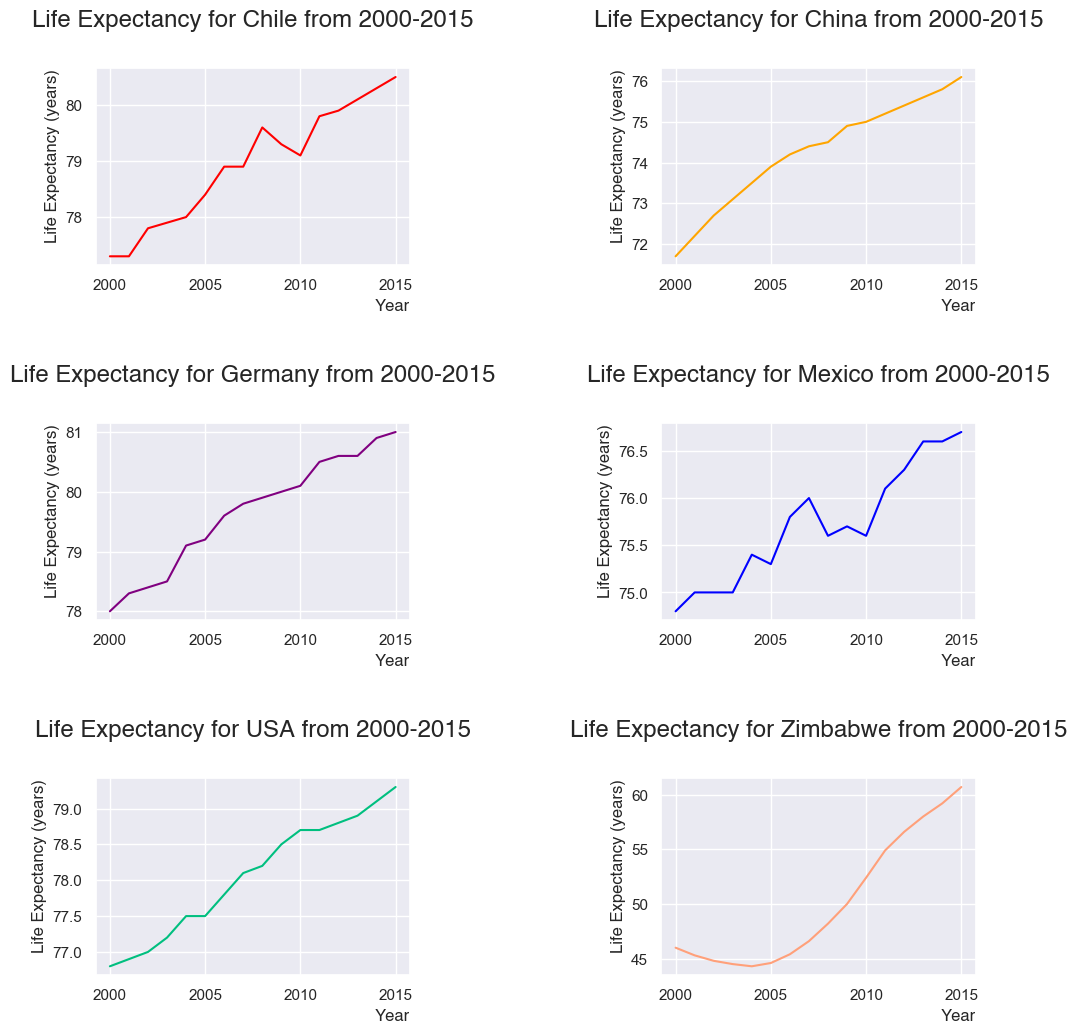

<Figure size 640x480 with 0 Axes>

In [210]:
# line graphs mapping Life Expectancy by country
countries = [x for x in np.unique(df_renamed.country)]
colors = ['#FF0000', '#FFA500', '#800080', '#0000FF', '#00bf7F', '#FFA07A', '#ADD8E6']

for i in range(len(countries)):
   country = countries[i]
   country_data = df_renamed[df_renamed.country == country]
   plt.subplot(3, 2, i+1)
   plt.plot(country_data.year, country_data.life_exp_years, c=colors[i])
   plt.title(f"Life Expectancy for {country} from 2000-2015", pad=30, fontdict={"fontname":"Helvetica", "fontsize":"x-large"})
   plt.xlabel("Year", loc="right", fontdict={"fontname":"Helvetica", "fontsize":"medium"})
   plt.ylabel("Life Expectancy (years)", loc="top", fontdict={"fontname":"Helvetica", "fontsize":"medium"})

plt.subplots_adjust(wspace=0.8, hspace=0.8, right=1.5, top=2)
plt.show()
plt.clf()

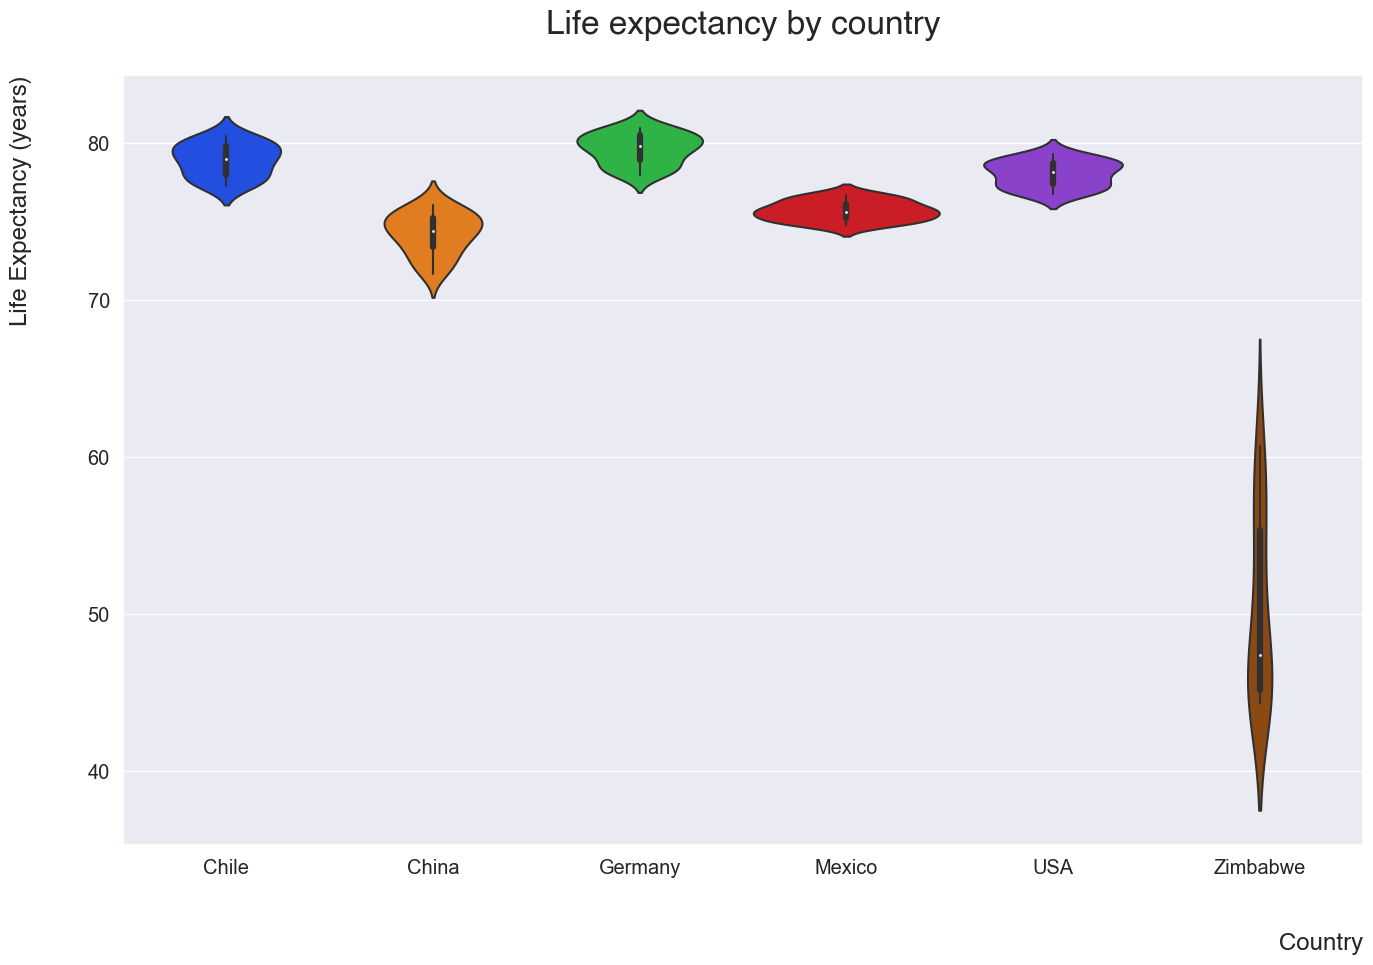

In [211]:
plt.figure(figsize=(16,10))
p1 = sns.violinplot(x=df_renamed.country, y=df_renamed.life_exp_years, width=.9 , palette="bright")
p1.tick_params(color="black", labelsize="large")
plt.title("Life expectancy by country", pad=30, fontdict={"fontname":"Helvetica", "fontsize":"24"})
plt.xlabel("Country", loc="right", labelpad=40, fontdict={"fontname":"Helvetica", "fontsize":"x-large"})
plt.ylabel("Life Expectancy (years)", labelpad=40, loc="top", fontdict={"fontname":"Helvetica", "fontsize":"x-large"})
plt.show()
# plt.clf()

In [212]:
data = {'country': [], 'LE_min': [], 'LE_max': [], 'LE_mean': [], 'LE_2000': [], 'LE_2015': [], 'LE_growth': []}

for i in range(len(countries)):
   country = countries[i]
   country_data = df_renamed[df_renamed.country == country]

   le_min = np.min(country_data.life_exp_years)
   le_max = np.max(country_data.life_exp_years)
   le_mean = np.mean(country_data.life_exp_years)
   le_2000 = country_data.loc[country_data.year == 2000, "life_exp_years"].values[0]
   le_2015 = country_data.loc[country_data.year == 2015, "life_exp_years"].values[0]
   le_growth = (le_2015 / le_2000) - 1

   data['country'].append(country)
   data['LE_min'].append(round(le_min, 2))
   data['LE_max'].append(round(le_max, 2))
   data['LE_mean'].append(round(le_mean))
   data['LE_2000'].append(round(le_2000, 2))
   data['LE_2015'].append(round(le_2015, 2))
   data['LE_growth'].append(le_growth)

le_df = pd.DataFrame.from_dict(data)

## GDP vs Life Expactancy Analysis

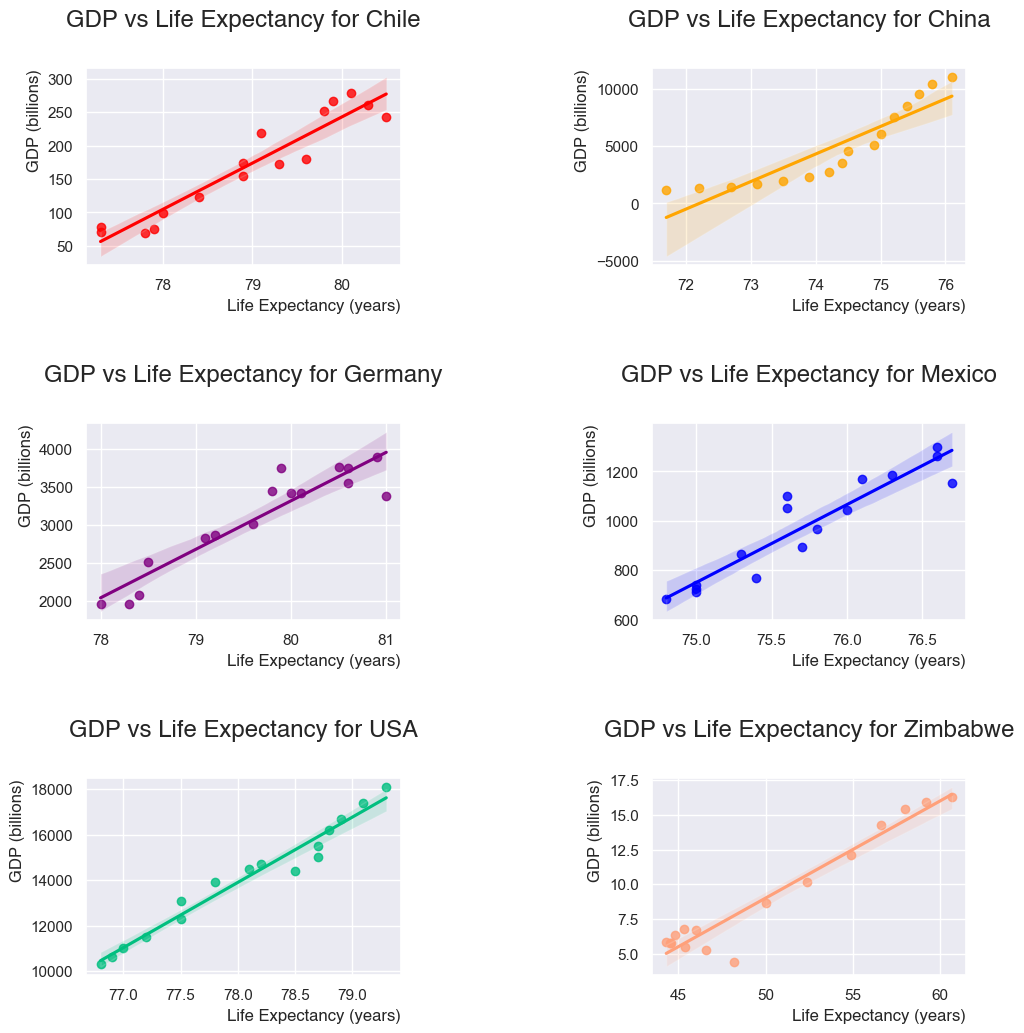

<Figure size 640x480 with 0 Axes>

In [230]:
countries = [x for x in np.unique(df_renamed.country)]
colors = ['#FF0000', '#FFA500', '#800080', '#0000FF', '#00bf7F', '#FFA07A', '#ADD8E6']

for i in range(len(countries)):
   country = countries[i]
   country_data = df_renamed[df_renamed.country == country]
   plt.subplot(3, 2, i+1)
   sns.regplot(x=country_data.life_exp_years, y=country_data.gdp_bil, color=colors[i])
   plt.title(f"GDP vs Life Expectancy for {country}", pad=30, fontdict={"fontname":"Helvetica", "fontsize":"x-large"})
   plt.xlabel("Life Expectancy (years)", loc="right", fontdict={"fontname":"Helvetica", "fontsize":"medium"})
   plt.ylabel("GDP (billions)", loc="top", fontdict={"fontname":"Helvetica", "fontsize":"medium"})

plt.subplots_adjust(wspace=0.8, hspace=0.8, right=1.5, top=2)
plt.show()
plt.clf()

In [214]:
le_gdp_df = pd.DataFrame()
le_gdp_df["country"] = [country for country in countries]
le_gdp_df["LE_growth"] = [le_ for le_ in le_df.LE_growth]
le_gdp_df["GDP_growth"] = [gdp_ for gdp_ in gdp_df.GDP_growth]

print(le_gdp_df)

    country  LE_growth  GDP_growth
0     Chile   0.041397    2.114758
1     China   0.061367    8.134189
2   Germany   0.038462    0.731126
3    Mexico   0.025401    0.685458
4       USA   0.032552    0.757282
5  Zimbabwe   0.319565    1.437186


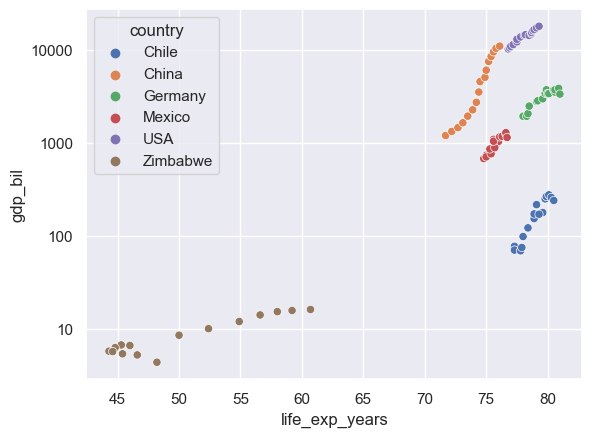

<Figure size 640x480 with 0 Axes>

In [232]:
from matplotlib.ticker import ScalarFormatter
ax = sns.scatterplot(x=df_renamed.life_exp_years, y=df_renamed.gdp_bil, hue=df_renamed.country)
plt.yscale("log")
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.show()
plt.clf()